In [1]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [3]:
tensor_const = tf.constant([[1, 2], [3, 4]])
print("Constant:\n", tensor_const)


Constant:
 tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [5]:
tensor_var = tf.Variable([[5, 6], [7, 8]])
print("Variable:\n", tensor_var)


Variable:
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[5, 6],
       [7, 8]])>


In [7]:
tf_zeros = tf.zeros([2, 3])
tf_ones = tf.ones([2, 3])
tf_rand = tf.random.uniform([2, 3], minval=0, maxval=1)

print("Zeros:\n", tf_zeros)
print("Ones:\n", tf_ones)
print("Random:\n", tf_rand)


Zeros:
 tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)
Ones:
 tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)
Random:
 tf.Tensor(
[[0.36697328 0.06788611 0.7227485 ]
 [0.73091304 0.53391945 0.5691899 ]], shape=(2, 3), dtype=float32)


In [9]:
a = tf.constant([[1, 2], [3, 4]])
b = tf.constant([[10, 20], [30, 40]])

print("Add:\n", tf.add(a, b))
print("Multiply:\n", tf.multiply(a, b))
print("Matrix Multiply:\n", tf.matmul(a, b))


Add:
 tf.Tensor(
[[11 22]
 [33 44]], shape=(2, 2), dtype=int32)
Multiply:
 tf.Tensor(
[[ 10  40]
 [ 90 160]], shape=(2, 2), dtype=int32)
Matrix Multiply:
 tf.Tensor(
[[ 70 100]
 [150 220]], shape=(2, 2), dtype=int32)


In [11]:
tensor = tf.constant([[1, 2, 3], [4, 5, 6]])

reshaped = tf.reshape(tensor, [3, 2])
sliced = tensor[:, 1]

print("Reshaped:\n", reshaped)
print("Sliced column:\n", sliced)


Reshaped:
 tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32)
Sliced column:
 tf.Tensor([2 5], shape=(2,), dtype=int32)


In [13]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = x ** 2 + 2 * x + 1

dy_dx = tape.gradient(y, x)
print("dy/dx at x=3:", dy_dx.numpy())  # Should be 2x + 2 = 8


dy/dx at x=3: 8.0


In [27]:
#Predict house price on single feature

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted price for 7.5 sq.ft: $443.45


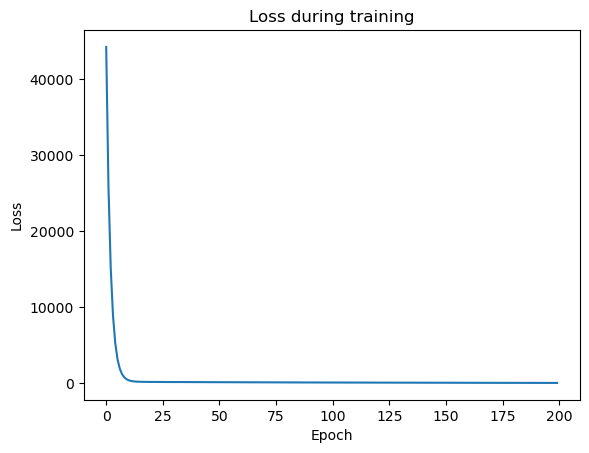

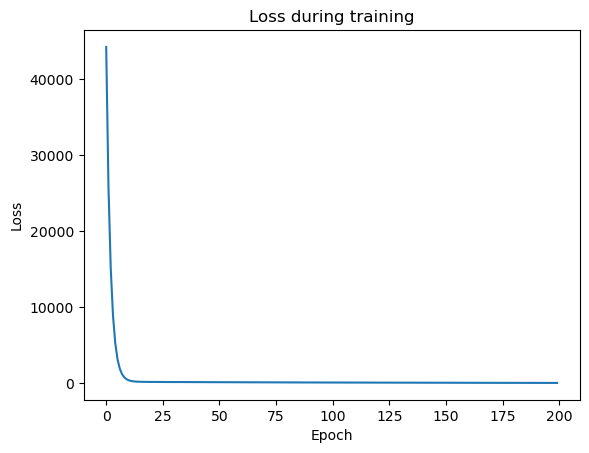

In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Size in 1000 sq. ft
X = np.array([1.0, 2.0, 3.0, 4.0, 5.0], dtype=np.float32)
# Price in $K
Y = np.array([100.0, 150.0, 200.0, 250.0, 300.0], dtype=np.float32)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])
model.compile(optimizer='sgd', loss='mean_squared_error')

history = model.fit(X, Y, epochs=200, verbose=0)

# New input (house size in 1000 sq.ft)
X_unknown = np.array([7.5], dtype=np.float32)
# Predict using the trained model
Y_pred = model.predict(X_unknown)
# Display result
print(f"Predicted price for {X_unknown[0] } sq.ft: ${Y_pred[0][0] :.2f}")

plt.plot(history.history['loss'])
plt.title("Loss during training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

plt.plot(history.history['loss'])
plt.title("Loss during training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


In [25]:
# Goal: Predict house price using multiple features

In [51]:
import tensorflow as tf
import numpy as np
import pandas as pd

# Features: [size, bedrooms, age]
X = np.array([
    [1.0, 1, 10],
    [2.0, 2, 5],
    [3.0, 3, 20],
    [4.0, 4, 15],
    [5.0, 5, 2],
], dtype=np.float32)

# Prices in $K
Y = np.array([120, 180, 210, 250, 310], dtype=np.float32)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[3])  # 3 features
])


model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, Y, epochs=300, verbose=0)

# New input: [size, bedrooms, age]
X_unknown = np.array([[1, 3, 3]], dtype=np.float32)

predicted_price = model.predict(X_unknown)
print(f"Predicted price: ${predicted_price[0][0] :.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Predicted price: $141.20


In [ ]:
#Goal: Predict house price using multiple features, Hidden Layers with ReLU Activation

In [56]:
import tensorflow as tf
import numpy as np
import pandas as pd

# Features: [size, bedrooms, age]
X = np.array([
    [1.0, 1, 10],
    [2.0, 2, 5],
    [3.0, 3, 20],
    [4.0, 4, 15],
    [5.0, 5, 2],
], dtype=np.float32)

# Prices in $K
Y = np.array([120, 180, 210, 250, 310], dtype=np.float32)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[3]),  # Input layer (3 features)
    tf.keras.layers.Dense(32, activation='relu'),                   # Hidden layer 1
    tf.keras.layers.Dense(16, activation='relu'),                   # Hidden layer 2
    tf.keras.layers.Dense(1)                                        # Output layer
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, Y, epochs=300, verbose=0)

# New input: [size, bedrooms, age]
X_unknown = np.array([[1, 5, 3]], dtype=np.float32)

predicted_price = model.predict(X_unknown)
print(f"Predicted price: ${predicted_price[0][0] :.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predicted price: $189.56


In [58]:
#NLP sentiment analysis

In [70]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sample text data (hardcoded)
texts = [
    "I love programming",       # Positive sentiment
    "I hate bugs",              # Negative sentiment
    "Cobol is not so fun",      # Negative sentiment
    "Error in my code again",   # Negative sentiment
    "I feel great today",       # Positive sentiment
    "This is frustrating",      # Negative sentiment
    "I love Java"               # Positive sentiment
]

# Labels: 1 for positive sentiment, 0 for negative sentiment
labels = np.array([1, 0, 0, 0, 1, 0, 1])

# Initialize the Tokenizer
tokenizer = Tokenizer(num_words=100, oov_token="<OOV>")  # 'num_words' limits the vocab size, 'oov_token' for out-of-vocabulary words
tokenizer.fit_on_texts(texts)

# Convert texts to sequences of integers
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to ensure all have the same length
max_length = max([len(seq) for seq in sequences])  # To pad to the length of the longest sequence
X = pad_sequences(sequences, maxlen=max_length, padding='post')  # Padding at the end

print("Tokenized and padded sequences:\n", X)

model = tf.keras.Sequential([
    # Embedding layer: converts words into dense vectors
    tf.keras.layers.Embedding(input_dim=100, output_dim=16, input_length=max_length),
    
    # Flatten the embeddings to feed into dense layers
    tf.keras.layers.Flatten(),
    
    # Dense layer for classification
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid output for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Train the model (use validation_split to check performance during training)
model.fit(X, labels, epochs=50, verbose=1)

# Example of model evaluation (e.g., accuracy on training set)
loss, accuracy = model.evaluate(X, labels)
print(f"Training Accuracy: {accuracy * 100:.2f}%")

# New sentences to classify
new_texts = [
    "I am happy today",      # Positive sentiment
    "This is terrible",      # Negative sentiment
    "I hate Cobol"
]

# Tokenize and pad the new texts
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_X = pad_sequences(new_sequences, maxlen=max_length, padding='post')

# Make predictions
predictions = model.predict(new_X)

# Print predictions
for text, pred in zip(new_texts, predictions):
    sentiment = "Positive" if pred > 0.5 else "Negative"
    print(f"Text: '{text}' --> Sentiment: {sentiment}")


Tokenized and padded sequences:
 [[ 2  3  5  0  0]
 [ 2  6  7  0  0]
 [ 8  4  9 10 11]
 [12 13 14 15 16]
 [ 2 17 18 19  0]
 [20  4 21  0  0]
 [ 2  3 22  0  0]]


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4286 - loss: 0.6963
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4286 - loss: 0.6922
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5714 - loss: 0.6882
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5714 - loss: 0.6843
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5714 - loss: 0.6808
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5714 - loss: 0.6776
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5714 - loss: 0.6746
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5714 - loss: 0.6717
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5714 - loss: 0.6690
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.5714 - loss: 0.6663
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5714 - loss: 0.6636
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5714 - loss: 0.6607
Ep

In [72]:
#Clissification

In [76]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sample text data (hardcoded)
texts = [
    "The soccer match was thrilling",   # Sports
    "The president gave a speech today",  # Politics
    "I love watching basketball",        # Sports
    "The new tax reform is controversial", # Politics
    "Football is my favorite sport",      # Sports
    "The government is working on new policies", # Politics
]

# Labels: 0 for Sports, 1 for Politics
labels = np.array([0, 1, 0, 1, 0, 1])

# Initialize the Tokenizer
tokenizer = Tokenizer(num_words=100, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

# Convert texts to sequences of integers
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to ensure all have the same length
max_length = max([len(seq) for seq in sequences])  # Length of the longest sequence
X = pad_sequences(sequences, maxlen=max_length, padding='post')  # Padding at the end

print("Tokenized and padded sequences:\n", X)

model = tf.keras.Sequential([
    # Embedding layer: Converts integer-encoded words to dense vectors
    tf.keras.layers.Embedding(input_dim=100, output_dim=16, input_length=max_length),
    
    # Flatten the embeddings to feed into dense layers
    tf.keras.layers.Flatten(),
    
    # Dense layers for classification
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid output for binary classification (0 or 1)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
model.fit(X, labels, epochs=50, verbose=1)

# New sentences to classify
new_texts = [
    "The championship game was amazing",   # Sports
    "The senate passed a new law today",   # Politics
]

# Tokenize and pad the new texts
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_X = pad_sequences(new_sequences, maxlen=max_length, padding='post')

# Make predictions
predictions = model.predict(new_X)

# Display predictions
for text, pred in zip(new_texts, predictions):
    category = "Sports" if pred < 0.5 else "Politics"
    print(f"Text: '{text}' --> Predicted Category: {category}")


Tokenized and padded sequences:
 [[ 2  5  6  7  8  0  0]
 [ 2  9 10 11 12 13  0]
 [14 15 16 17  0  0  0]
 [ 2  4 18 19  3 20  0]
 [21  3 22 23 24  0  0]
 [ 2 25  3 26 27  4 28]]


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6667 - loss: 0.6877
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6667 - loss: 0.6839
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.6801
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.6767
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.6735
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 1.0000 - loss: 0.6703
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 1.0000 - loss: 0.6672
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.6647
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.6620
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 1.0000 - loss: 0.6592
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 0.6563
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.6534
Ep

In [78]:
#simple recommendation system

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Hardcoded movie dataset
movies = [
    {"title": "Avengers: Endgame", "description": "Superheroes fight to save the universe"},
    {"title": "The Dark Knight", "description": "Batman battles the Joker in Gotham City"},
    {"title": "Interstellar", "description": "A team travels through space to save humanity"},
    {"title": "Inception", "description": "A thief enters dreams to steal secrets"},
    {"title": "The Matrix", "description": "A hacker discovers the truth about reality"},
    {"title": "Iron Man", "description": "A billionaire builds a high-tech suit to become a superhero"},
    {"title": "The Martian", "description": "An astronaut is stranded on Mars and survives"},
]


# Extract descriptions
descriptions = [movie["description"] for movie in movies]

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(descriptions)

# Compute pairwise cosine similarity matrix
similarity_matrix = cosine_similarity(tfidf_matrix)

# Compute pairwise cosine similarity matrix
similarity_matrix = cosine_similarity(tfidf_matrix)

def recommend_movies(movie_title, top_n=3):
    # Find index of the movie with given title
    movie_indices = {movie["title"]: idx for idx, movie in enumerate(movies)}
    
    if movie_title not in movie_indices:
        print("Movie not found.")
        return
    
    idx = movie_indices[movie_title]
    
    # Get similarity scores for the given movie
    sim_scores = list(enumerate(similarity_matrix[idx]))
    
    # Sort by similarity score (excluding the movie itself)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:]
    
    print(f"\n📽️ Recommended movies similar to: **{movie_title}**")
    for i, (movie_idx, score) in enumerate(sim_scores[:top_n]):
        print(f"{i+1}. {movies[movie_idx]['title']} (score: {score:.2f})")


# Recommend based on "Iron Man"
recommend_movies("Iron Man")

# Recommend based on "Interstellar"
recommend_movies("Interstellar")





📽️ Recommended movies similar to: **Iron Man**
1. Avengers: Endgame (score: 0.07)
2. Inception (score: 0.06)
3. Interstellar (score: 0.06)

📽️ Recommended movies similar to: **Interstellar**
1. Avengers: Endgame (score: 0.20)
2. Inception (score: 0.07)
3. Iron Man (score: 0.06)


In [86]:
#Content creation- generate new text based on patterns learned from input text

In [ ]:
import numpy as np
import requests
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from bs4 import BeautifulSoup

# ============================
# 📘 Scrape Wikipedia Text
# ============================

def get_wikipedia_intro(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Get the first paragraph in the content
    paragraphs = soup.select("div.mw-parser-output > p")
    
    for p in paragraphs:
        text = p.get_text(strip=True)
        if text and len(text.split()) > 20:  # Skip short blurbs or empty
            return text.lower()
    return ""

wiki_url = "https://en.wikipedia.org/wiki/Kayastha"
text = get_wikipedia_intro(wiki_url)

if not text:
    raise ValueError("Failed to extract text. Check the URL or structure.")

print("Scraped Text Sample:\n", text[:300])

# ============================
# 🔤 Preprocess Characters
# ============================

chars = sorted(list(set(text)))
char_to_idx = {ch: idx for idx, ch in enumerate(chars)}
idx_to_char = {idx: ch for ch, idx in char_to_idx.items()}
vocab_size = len(chars)

print(f"\n📚 Unique characters: {vocab_size}")

# ============================
# 📊 Prepare Sequences
# ============================

seq_length = 40
sequences, next_chars = [], []

for i in range(len(text) - seq_length):
    seq = text[i:i + seq_length]
    next_char = text[i + seq_length]
    sequences.append([char_to_idx[c] for c in seq])
    next_chars.append(char_to_idx[next_char])

X = np.array(sequences)
y = to_categorical(next_chars, num_classes=vocab_size)

print(f"Total sequences: {len(X)}")

# ============================
# 🧠 Build LSTM Model
# ============================

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=seq_length),
    LSTM(128, return_sequences=False),
    Dense(vocab_size, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

# ============================
# 🚀 Train the Model
# ============================

model.fit(X, y, batch_size=64, epochs=30, verbose=1)

# ============================
# ✍️ Text Generator
# ============================

def generate_text(seed_text, length=300):
    seed_text = seed_text.lower()
    generated = seed_text
    for _ in range(length):
        input_seq = [char_to_idx.get(c, 0) for c in generated[-seq_length:]]
        input_seq = np.array(input_seq).reshape(1, -1)
        pred = model.predict(input_seq, verbose=0)
        next_char = idx_to_char[np.argmax(pred)]
        generated += next_char
    return generated

# ============================
# 🧪 Test Generation
# ============================

seed = "the kayastha community is known for"
generated = generate_text(seed, length=300)
print("\nGenerated Text:\n", generated)


Scraped Text Sample:
 kayastha(orkayasth) denotes a cluster of disparate indian communities broadly categorised by the regions of theindian subcontinentin which they were traditionally located—thechitraguptavanshi kayasthasofnorth india, thechandraseniya kayastha prabhusofmaharashtra, thebengali kayasthasofbengalandkaran

📚 Unique characters: 36
Total sequences: 437


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 3.5768
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3.4757
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.1938
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.0583
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.0399
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.0118
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.0466
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.0501
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2.9722
Epoch 10/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.0065
Epoch 11/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.9935
Epoch 12/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2.9931
Epoch 13/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.9130 
Epoch 14/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.8848
Epoch 15/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2.8627
Epoch 16/30
7/7 ━━━━━━━━━━━━━━━━━